In [1]:
import numpy as np
import matplotlib.pyplot as plt

TOA WK97

In [2]:
def get_albedo(tij):
    a = 0.525 - 0.245*np.tanh((tij - 268)/5)
    if a > 0.77:
        a = 0.77
    elif a < 0.28:
        a = 0.28
    return a

In [3]:
def get_toa(tij, lon):

    u = np.cos(lon)
    p = 1 * 300 * 10**(-6)
    a = get_albedo(tij)

    if tij < 280:
        toa = -0.6891 + 1.0468*a + 0.007845*tij -0.0028373*p -0.28899*u
        toa += -0.037412*a*p - 0.0063499*u*p + 0.20122*a*u
        toa += -0.0018508*a*tij + 0.00013649*u*tij + 9.8581e-5*p*tij
        toa += 0.073239*a**2 - 1.6555e-5*tij**2 + 6.5817e-4*p**2 + 0.081218*u**2

    else:
        toa = 1.1082 + 1.5172*a - 5.7993e-3*tij +0.019705*p - 0.1867*u
        toa += -0.031355*a*u - 0.010214*u*p + 0.20986*a*u
        toa += -3.7098e-3*a*tij -1.1335e-4*u*tij +5.3714e-5*p*tij 
        toa += 0.075887*a**2 +9.269e-6*tij**2 - 4.1327e-4*p**2 + 0.063298*u**2

    return toa

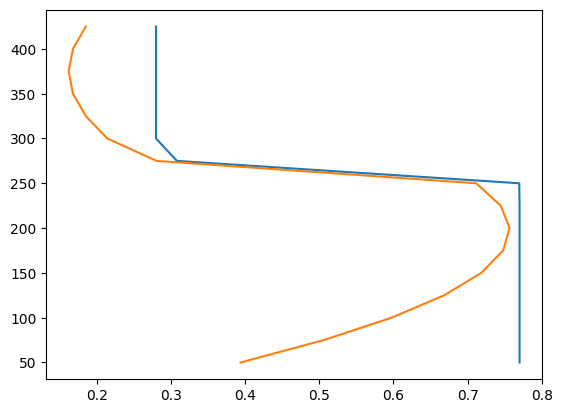

In [4]:
temperature = np.arange(start=50, stop = 450, step = 25)
lon = 0

surface, top = [], []
for t in temperature:
    surface.append(get_albedo(t))
    top.append(get_toa(t, lon))

plt.plot(surface, temperature)
plt.plot(top, temperature)
plt.show()

R24

In [40]:
def diff(p, m0, t_avg):
    d = 0.02 * p * (m0/29)**2 * 11.1868**(-1) * (t_avg/288)**12
    return d

In [46]:
d1 = diff(1, 29, 50)
d2 = diff(1, 2, 50)
d3 = diff(1, 44, 50)
d1, d2, d3

(1.340461425659355e-12, 6.375559693980286e-15, 3.085770891886458e-12)

In [12]:
c_land = 5.25e6
c_ocean = 40*c_land
def get_cheat(tij, f_ocean):
    if tij < 273:
        f_ice = 1 - np.exp((tij-273)/10)
        if tij > 263:
            c_ice = 9.2*c_land
        else:
            c_ice = 2*c_land
    else:
        f_ice = 0
        c_ice = 0
    c = (1-f_ocean)*c_land + f_ocean*((1-f_ice)*c_ocean + f_ice*c_ice)
    return c

In [36]:
def clouds(t, pd, pv):
    fe = 90
    rho = pd*1e6/(287*t) + pv+1e6/(461.5)
    rho = rho
    print(rho)
    fs = 1e3 * rho * 1.5e-3 * 10 * 7e-3
    fl = (1-0.77)*5.9e5 * 1.5e-3 * 10 * rho * 0.0155
    fc = fs + fl
    print(fs, fl, fc)

    c = min(0.75*np.log10(fc/fe + 1), 1)
    cir = min(-7*np.log10(fc/fe+1), -10)
    cp = max(0.5878*np.log(t)-2.9532, 0.3)
    calb = min(cp*np.log10(fc/fe + 1), 1)
    
    return c, cir, calb

In [37]:
t = 254
a = get_albedo(t)
c, cir, calb = clouds(t, 1, 1)
c, cir, calb

2181.5650347402106
229.0643286477221 68828.92223731233 69057.98656596006


(1, -20.198759206572532, 0.870408054323607)

In [38]:
f = np.exp((17*(288-273))/(288-273 + 243))
f

2.6868569570362606